In [43]:
!pip install tensorflow

In [ ]:
!pip install pandas_datareader

In [45]:
import pandas_datareader as pdr
key="ca8cd355d0b9de9e3e637bc6832c5b375bca876c"

In [46]:
df=pdr.get_data_tiingo('INFY',api_key=key)

In [47]:
df.to_csv('infosys_data.csv')

In [48]:
import pandas as pd

In [49]:
df_infy_data=pd.read_csv('infosys_data.csv')

In [50]:
df_infy_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,INFY,2016-07-08 00:00:00+00:00,17.84,17.93,17.7500,17.80,1932388,7.765792,7.804969,7.726615,7.748380,3864776,0.0,1.0
1,INFY,2016-07-11 00:00:00+00:00,18.13,18.18,17.9000,17.94,3002287,7.892030,7.913795,7.791910,7.809322,6004574,0.0,1.0
2,INFY,2016-07-12 00:00:00+00:00,18.27,18.33,18.0400,18.13,5089213,7.952972,7.979090,7.852853,7.892030,10178426,0.0,1.0
3,INFY,2016-07-13 00:00:00+00:00,18.31,18.44,18.2500,18.38,4213511,7.970384,8.026973,7.944266,8.000855,8427022,0.0,1.0
4,INFY,2016-07-14 00:00:00+00:00,18.44,18.48,18.2100,18.32,5258204,8.026973,8.044386,7.926854,7.974737,10516408,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,INFY,2021-06-29 00:00:00+00:00,21.45,21.50,21.2200,21.31,4748593,21.450000,21.500000,21.220000,21.310000,4748593,0.0,1.0
1253,INFY,2021-06-30 00:00:00+00:00,21.19,21.43,21.1749,21.41,6493540,21.190000,21.430000,21.174900,21.410000,6493540,0.0,1.0
1254,INFY,2021-07-01 00:00:00+00:00,20.96,21.24,20.8400,21.18,4670644,20.960000,21.240000,20.840000,21.180000,4670644,0.0,1.0
1255,INFY,2021-07-02 00:00:00+00:00,21.07,21.15,21.0200,21.10,4908701,21.070000,21.150000,21.020000,21.100000,4908701,0.0,1.0


In [51]:
df_infy_data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,INFY,2021-06-29 00:00:00+00:00,21.45,21.50,21.2200,21.31,4748593,21.45,21.50,21.2200,21.31,4748593,0.0,1.0
1253,INFY,2021-06-30 00:00:00+00:00,21.19,21.43,21.1749,21.41,6493540,21.19,21.43,21.1749,21.41,6493540,0.0,1.0
1254,INFY,2021-07-01 00:00:00+00:00,20.96,21.24,20.8400,21.18,4670644,20.96,21.24,20.8400,21.18,4670644,0.0,1.0
1255,INFY,2021-07-02 00:00:00+00:00,21.07,21.15,21.0200,21.10,4908701,21.07,21.15,21.0200,21.10,4908701,0.0,1.0
1256,INFY,2021-07-06 00:00:00+00:00,21.11,21.11,20.9800,21.03,5728562,21.11,21.11,20.9800,21.03,5728562,0.0,1.0


In [52]:
df2=df_infy_data['close'] #prediction on close coloumn of company

In [53]:
df2 #only closing data of infosys stock price

0       17.84
1       18.13
2       18.27
3       18.31
4       18.44
        ...  
1252    21.45
1253    21.19
1254    20.96
1255    21.07
1256    21.11
Name: close, Length: 1257, dtype: float64

In [54]:
df2.shape

(1257,)

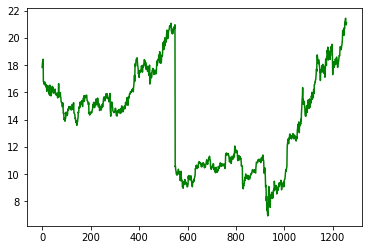

In [55]:
#Plotting of dataFrame(closing_data) in matplot graph
import matplotlib.pyplot as plt
plt.plot(df2,color='green')

In [56]:
###let's apply MinMax scaler for prediction

In [57]:
import numpy as np

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [60]:
df2

array([[0.75120606],
       [0.77119228],
       [0.7808408 ],
       ...,
       [0.96623019],
       [0.97381116],
       [0.97656788]])

In [61]:
#let's split data into train and test split
train_data_size=int(len(df2)*0.70)
test_data_size=len(df2)-train_data_size

train_data,test_data=df2[0:train_data_size,:],df2[train_data_size:len(df2),:1]

In [62]:
train_data_size,test_data_size

(879, 378)

In [63]:
train_data

array([[0.75120606],
       [0.77119228],
       [0.7808408 ],
       [0.78359752],
       [0.79255686],
       [0.68022054],
       [0.68090972],
       [0.66919366],
       [0.67608546],
       [0.66712612],
       [0.66368022],
       [0.67195038],
       [0.67608546],
       [0.67263956],
       [0.66505858],
       [0.6540317 ],
       [0.66368022],
       [0.65127498],
       [0.64851826],
       [0.63059959],
       [0.64162646],
       [0.64300482],
       [0.64920744],
       [0.65954514],
       [0.6540317 ],
       [0.63404549],
       [0.63818057],
       [0.62095107],
       [0.61888353],
       [0.61612681],
       [0.61750517],
       [0.61061337],
       [0.66161268],
       [0.65127498],
       [0.62784287],
       [0.61750517],
       [0.60716747],
       [0.61474845],
       [0.61474845],
       [0.63128877],
       [0.64507236],
       [0.65472088],
       [0.65472088],
       [0.63059959],
       [0.62922123],
       [0.6505858 ],
       [0.62853205],
       [0.620

In [64]:
test_data

array([[0.22536182],
       [0.21778084],
       [0.21709166],
       [0.24396968],
       [0.25568573],
       [0.27153687],
       [0.27015851],
       [0.26946933],
       [0.26946933],
       [0.27153687],
       [0.26946933],
       [0.28256375],
       [0.28394211],
       [0.28187457],
       [0.27911785],
       [0.28669883],
       [0.28394211],
       [0.28394211],
       [0.27705031],
       [0.27567195],
       [0.28669883],
       [0.28256375],
       [0.27705031],
       [0.26946933],
       [0.27429359],
       [0.27636113],
       [0.29496899],
       [0.28669883],
       [0.28049621],
       [0.29427981],
       [0.30048243],
       [0.30461751],
       [0.3080634 ],
       [0.29496899],
       [0.28118539],
       [0.27980703],
       [0.25361819],
       [0.2157133 ],
       [0.23569952],
       [0.22536182],
       [0.2432805 ],
       [0.21984838],
       [0.19572708],
       [0.14748449],
       [0.15506547],
       [0.13507926],
       [0.07649897],
       [0.099

In [65]:
#data preprocessing #refrence krish naik
import numpy as np

In [66]:
def create_dataset_infy(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    
    return np.array(dataX),np.array(dataY)

In [67]:
time_step=100
x_train,y_train=create_dataset_infy(train_data,time_step)

x_test,y_test=create_dataset_infy(test_data,time_step)

In [68]:
x_train

array([[0.75120606, 0.77119228, 0.7808408 , ..., 0.49552033, 0.52308753,
        0.52515507],
       [0.77119228, 0.7808408 , 0.78359752, ..., 0.52308753, 0.52515507,
        0.52101999],
       [0.7808408 , 0.78359752, 0.79255686, ..., 0.52515507, 0.52101999,
        0.51964163],
       ...,
       [0.29083391, 0.29703653, 0.28876637, ..., 0.22742936, 0.2226051 ,
        0.22880772],
       [0.29703653, 0.28876637, 0.28669883, ..., 0.2226051 , 0.22880772,
        0.22191592],
       [0.28876637, 0.28669883, 0.28394211, ..., 0.22880772, 0.22191592,
        0.2329428 ]])

In [69]:
y_train

array([0.52101999, 0.51964163, 0.50792557, 0.50792557, 0.50999311,
       0.51895245, 0.5410062 , 0.54031702, 0.5375603 , 0.53480358,
       0.55341144, 0.5444521 , 0.54720882, 0.54858718, 0.54651964,
       0.55065472, 0.55341144, 0.54169538, 0.53824948, 0.54238456,
       0.53687112, 0.5375603 , 0.54376292, 0.5375603 , 0.56443832,
       0.55685734, 0.54307374, 0.55272226, 0.54031702, 0.5685734 ,
       0.57270848, 0.52101999, 0.52033081, 0.51688491, 0.51343901,
       0.51137147, 0.49276361, 0.49483115, 0.48656099, 0.47208822,
       0.48242591, 0.47346657, 0.47070986, 0.45830462, 0.4693315 ,
       0.47829083, 0.47622329, 0.49138525, 0.49414197, 0.52584425,
       0.52101999, 0.53135768, 0.54927636, 0.54583046, 0.5547898 ,
       0.54720882, 0.5754652 , 0.5582357 , 0.5685734 , 0.56995176,
       0.56995176, 0.5651275 , 0.58028946, 0.57477602, 0.58166782,
       0.56650586, 0.55754652, 0.55341144, 0.57064094, 0.58993797,
       0.59614059, 0.59407305, 0.58373535, 0.60854583, 0.57891

In [70]:
x_train.shape,y_train.shape

((778, 100), (778,))

In [71]:
x_test,y_test

(array([[0.22536182, 0.21778084, 0.21709166, ..., 0.14679531, 0.16609235,
         0.15506547],
        [0.21778084, 0.21709166, 0.24396968, ..., 0.16609235, 0.15506547,
         0.14886285],
        [0.21709166, 0.24396968, 0.25568573, ..., 0.15506547, 0.14886285,
         0.15988973],
        ...,
        [0.73673329, 0.75947622, 0.73742247, ..., 0.9862164 , 0.98897312,
         1.        ],
        [0.75947622, 0.73742247, 0.72777395, ..., 0.98897312, 1.        ,
         0.98208132],
        [0.73742247, 0.72777395, 0.75051688, ..., 1.        , 0.98208132,
         0.96623019]]),
 array([0.14886285, 0.15988973, 0.16815989, 0.16057891, 0.16057891,
        0.16815989, 0.18056513, 0.16471399, 0.16264645, 0.13232254,
        0.14955203, 0.15713301, 0.15024121, 0.16471399, 0.15713301,
        0.15299793, 0.15230875, 0.17091661, 0.14679531, 0.16195727,
        0.17849759, 0.18125431, 0.18745693, 0.18883529, 0.2053756 ,
        0.21847002, 0.22742936, 0.23432116, 0.22674018, 0.23776706,
 

In [72]:
x_test.shape,y_test.shape

((277, 100), (277,))

In [73]:
#reshaping x_train in 3 dimension before passing through LSTM model
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [74]:
#let's get LSTM Model (Stacked LSTM model)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [75]:
#Creating Stacked LSTM Model(one after one)
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model.summary() #checking model how it is made

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
#let's fit the training and testing data in model keeping epochs=100,batch_size=61
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 195ms/step - loss: 0.0645 - val_loss: 0.0280
Epoch 2/100
13/13 [==============================] - 2s 124ms/step - loss: 0.0141 - val_loss: 0.0030
Epoch 3/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0079 - val_loss: 0.0029
Epoch 4/100
13/13 [==============================] - 2s 122ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 5/100
13/13 [==============================] - 2s 121ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 6/100
13/13 [==============================] - 2s 121ms/step - loss: 0.0052 - val_loss: 0.0019
Epoch 7/100
13/13 [==============================] - 2s 130ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 8/100
13/13 [==============================] - 1s 111ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 9/100
13/13 [==============================] - 1s 112ms/step - loss: 0.0041 - val_loss: 0.0022
Epoch 10/100
13/13 [==============================] - 1s 111ms/step - loss: 0.0040 - val_lo

13/13 [==============================] - 1s 109ms/step - loss: 0.0012 - val_loss: 6.2134e-04
Epoch 81/100
13/13 [==============================] - 2s 116ms/step - loss: 0.0012 - val_loss: 8.8379e-04
Epoch 82/100
13/13 [==============================] - 2s 119ms/step - loss: 0.0011 - val_loss: 8.3490e-04
Epoch 83/100
13/13 [==============================] - 1s 114ms/step - loss: 0.0011 - val_loss: 6.5551e-04
Epoch 84/100
13/13 [==============================] - 1s 114ms/step - loss: 9.9944e-04 - val_loss: 6.8248e-04
Epoch 85/100
13/13 [==============================] - 1s 109ms/step - loss: 0.0010 - val_loss: 7.3768e-04
Epoch 86/100
13/13 [==============================] - 1s 110ms/step - loss: 0.0011 - val_loss: 7.4846e-04
Epoch 87/100
13/13 [==============================] - 1s 109ms/step - loss: 0.0011 - val_loss: 7.3429e-04
Epoch 88/100
13/13 [==============================] - 1s 108ms/step - loss: 9.9329e-04 - val_loss: 0.0078
Epoch 89/100
13/13 [==============================] - 1

after getting min loss which is 0.0010 we are ready for prediction.

In [79]:
import tensorflow as tf

In [80]:
tf.__version__ #checking tensorflow version

'2.5.0'

In [83]:
#let's check the prediction and performance metrics of the data
train_predict_data=model.predict(x_train)
test_predict_data=model.predict(x_test)

In [84]:
train_predict_data

array([[0.5378598 ],
       [0.5437584 ],
       [0.5439603 ],
       [0.5373581 ],
       [0.52987194],
       [0.5252845 ],
       [0.5264971 ],
       [0.5373532 ],
       [0.54844564],
       [0.5545572 ],
       [0.5554522 ],
       [0.56067127],
       [0.5630033 ],
       [0.56402296],
       [0.5647873 ],
       [0.5645457 ],
       [0.5656122 ],
       [0.56809074],
       [0.56603855],
       [0.5616608 ],
       [0.55984807],
       [0.55802613],
       [0.55722207],
       [0.5596633 ],
       [0.5604149 ],
       [0.5702345 ],
       [0.57764   ],
       [0.5756983 ],
       [0.5742189 ],
       [0.56902176],
       [0.5747412 ],
       [0.5845644 ],
       [0.57211953],
       [0.5547687 ],
       [0.5415595 ],
       [0.5338823 ],
       [0.53050977],
       [0.52344257],
       [0.51828283],
       [0.51321614],
       [0.50501835],
       [0.50197333],
       [0.49924335],
       [0.49636364],
       [0.49017507],
       [0.48805976],
       [0.49129087],
       [0.494

In [88]:
test_predict_data

array([[0.16200706],
       [0.16408312],
       [0.16565293],
       [0.16805512],
       [0.16980627],
       [0.17068186],
       [0.1718885 ],
       [0.17494178],
       [0.1767256 ],
       [0.17677787],
       [0.17181942],
       [0.16668591],
       [0.16401502],
       [0.1626867 ],
       [0.16403696],
       [0.16593292],
       [0.16700178],
       [0.16715845],
       [0.16919672],
       [0.1692867 ],
       [0.1696479 ],
       [0.17260793],
       [0.17731833],
       [0.18298629],
       [0.18836713],
       [0.19483224],
       [0.20296595],
       [0.21214852],
       [0.22136748],
       [0.2277722 ],
       [0.23280579],
       [0.23731443],
       [0.24222875],
       [0.2617965 ],
       [0.29246852],
       [0.324073  ],
       [0.35302377],
       [0.37291428],
       [0.37995532],
       [0.3772499 ],
       [0.3719241 ],
       [0.37271157],
       [0.3759346 ],
       [0.383885  ],
       [0.394481  ],
       [0.40225503],
       [0.40783313],
       [0.406

In [89]:
#transforming the data in original form
train_predict_data=scaler.inverse_transform(train_predict_data)
test_predict_data=scaler.inverse_transform(test_predict_data)

In [90]:
train_predict_data

array([[14.744345 ],
       [14.829934 ],
       [14.832864 ],
       [14.737066 ],
       [14.628441 ],
       [14.561878 ],
       [14.579473 ],
       [14.736996 ],
       [14.897946 ],
       [14.986625 ],
       [14.999611 ],
       [15.07534  ],
       [15.109178 ],
       [15.123974 ],
       [15.135064 ],
       [15.131558 ],
       [15.147033 ],
       [15.182997 ],
       [15.153219 ],
       [15.089699 ],
       [15.063395 ],
       [15.03696  ],
       [15.025292 ],
       [15.060714 ],
       [15.07162  ],
       [15.214103 ],
       [15.321557 ],
       [15.293383 ],
       [15.271917 ],
       [15.1965065],
       [15.279495 ],
       [15.4220295],
       [15.241455 ],
       [14.989693 ],
       [14.798029 ],
       [14.686633 ],
       [14.637697 ],
       [14.5351515],
       [14.460284 ],
       [14.386766 ],
       [14.267817 ],
       [14.223634 ],
       [14.184021 ],
       [14.142237 ],
       [14.052441 ],
       [14.021748 ],
       [14.068631 ],
       [14.11

In [95]:
#calculate RSME performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict_data))

14.003158857387007

In [96]:
##RMSE of test data
math.sqrt(mean_squared_error(y_test,test_predict_data))

15.62995085403432

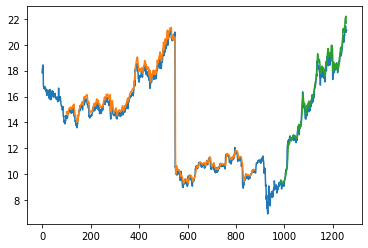

In [100]:
#REFFERENCE BY KRISH NAIK 
#Plotting
#shift train predictions for plotting
look_back=100
train_predict_plot=np.empty_like(df2)
train_predict_plot[:, :]=np.nan
train_predict_plot[look_back:len(train_predict_data)+look_back, :]=train_predict_data

#shift test predictions for plotting
test_predict_plot=np.empty_like(df2)
test_predict_plot[:, :]=np.nan
test_predict_plot[len(train_predict_data)+(look_back*2)+1:len(df2) -1, :]=test_predict_data

#predict baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)

plt.show()

In [101]:
len(test_predict_data)

277

In [115]:
x_input=test_predict_data[177:].reshape(1,-1)
x_input.shape

(1, 100)

In [116]:
#xhangind x_input into list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [117]:
temp_input

[18.223512649536133,
 17.9832820892334,
 18.02824592590332,
 18.24830436706543,
 18.18136215209961,
 17.980182647705078,
 17.996694564819336,
 18.124452590942383,
 18.00935935974121,
 17.763967514038086,
 17.81216049194336,
 17.742860794067383,
 17.528947830200195,
 17.72481346130371,
 18.13818359375,
 18.64447593688965,
 18.723569869995117,
 18.70022964477539,
 18.470977783203125,
 18.684738159179688,
 18.94300079345703,
 19.316341400146484,
 19.40639877319336,
 19.528675079345703,
 19.712078094482422,
 19.653072357177734,
 19.097339630126953,
 19.033750534057617,
 19.368253707885742,
 19.370786666870117,
 19.286577224731445,
 19.119287490844727,
 19.222919464111328,
 19.126798629760742,
 19.295984268188477,
 19.356416702270508,
 19.537084579467773,
 19.860374450683594,
 19.96038818359375,
 19.82242774963379,
 19.7714900970459,
 19.90674591064453,
 19.67203140258789,
 18.995222091674805,
 17.90706443786621,
 17.97088050842285,
 18.36503028869629,
 18.640722274780273,
 18.5638561248779

In [140]:
##again refrence from krish nail module
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
        

0 day input [19.28657722 19.11928749 19.22291946 19.12679863 19.29598427 19.3564167
 19.53708458 19.86037445 19.96038818 19.82242775 19.7714901  19.90674591
 19.6720314  18.99522209 17.90706444 17.97088051 18.36503029 18.64072227
 18.56385612 18.49169159 18.26389122 18.13595963 18.15653801 18.23417473
 18.33296776 18.50729942 18.32844162 18.24346161 18.16789246 18.25401306
 18.53162956 18.55659294 18.50569344 18.37200356 18.0886097  17.98442459
 18.18207932 18.36169434 18.50747681 18.68811035 18.9107933  19.05840683
 19.06619453 19.07215118 19.4199791  19.71813965 19.80633354 19.7485199
 19.71244621 19.61110306 19.68069077 19.84512329 20.01831627 20.21504974
 20.4666996  21.04446983 21.23635674 21.03227615 20.98948097 21.22850609
 20.97771454 21.09694481 21.40445709 21.47576523 21.86960793 22.07211113
 22.10184669 22.1956501  21.98140526 21.67438316  3.64004779  3.66576552
  3.6121273   3.54766464  3.47629809  3.38696814  3.22787786  2.92716217
  2.5313139   2.1163969   1.76261365  1.5

9 day output [[2.0140388]]
10 day input [19.7714901  19.90674591 19.6720314  18.99522209 17.90706444 17.97088051
 18.36503029 18.64072227 18.56385612 18.49169159 18.26389122 18.13595963
 18.15653801 18.23417473 18.33296776 18.50729942 18.32844162 18.24346161
 18.16789246 18.25401306 18.53162956 18.55659294 18.50569344 18.37200356
 18.0886097  17.98442459 18.18207932 18.36169434 18.50747681 18.68811035
 18.9107933  19.05840683 19.06619453 19.07215118 19.4199791  19.71813965
 19.80633354 19.7485199  19.71244621 19.61110306 19.68069077 19.84512329
 20.01831627 20.21504974 20.4666996  21.04446983 21.23635674 21.03227615
 20.98948097 21.22850609 20.97771454 21.09694481 21.40445709 21.47576523
 21.86960793 22.07211113 22.10184669 22.1956501  21.98140526 21.67438316
  3.64004779  3.66576552  3.6121273   3.54766464  3.47629809  3.38696814
  3.22787786  2.92716217  2.5313139   2.1163969   1.76261365  1.55721354
  1.50809002  1.56267416  1.6719234   1.81173122  1.96677876  2.11158705
  2.2164588

19 day output [[1.9675567]]
20 day input [18.26389122 18.13595963 18.15653801 18.23417473 18.33296776 18.50729942
 18.32844162 18.24346161 18.16789246 18.25401306 18.53162956 18.55659294
 18.50569344 18.37200356 18.0886097  17.98442459 18.18207932 18.36169434
 18.50747681 18.68811035 18.9107933  19.05840683 19.06619453 19.07215118
 19.4199791  19.71813965 19.80633354 19.7485199  19.71244621 19.61110306
 19.68069077 19.84512329 20.01831627 20.21504974 20.4666996  21.04446983
 21.23635674 21.03227615 20.98948097 21.22850609 20.97771454 21.09694481
 21.40445709 21.47576523 21.86960793 22.07211113 22.10184669 22.1956501
 21.98140526 21.67438316  3.64004779  3.66576552  3.6121273   3.54766464
  3.47629809  3.38696814  3.22787786  2.92716217  2.5313139   2.1163969
  1.76261365  1.55721354  1.50809002  1.56267416  1.6719234   1.81173122
  1.96677876  2.11158705  2.2164588   2.26498318  2.26072836  2.2210269
  2.16735768  2.11807704  2.08430767  2.06887531  2.06795287  2.07439327
  2.08124709 

29 day output [[1.9468656]]
30 day input [18.53162956 18.55659294 18.50569344 18.37200356 18.0886097  17.98442459
 18.18207932 18.36169434 18.50747681 18.68811035 18.9107933  19.05840683
 19.06619453 19.07215118 19.4199791  19.71813965 19.80633354 19.7485199
 19.71244621 19.61110306 19.68069077 19.84512329 20.01831627 20.21504974
 20.4666996  21.04446983 21.23635674 21.03227615 20.98948097 21.22850609
 20.97771454 21.09694481 21.40445709 21.47576523 21.86960793 22.07211113
 22.10184669 22.1956501  21.98140526 21.67438316  3.64004779  3.66576552
  3.6121273   3.54766464  3.47629809  3.38696814  3.22787786  2.92716217
  2.5313139   2.1163969   1.76261365  1.55721354  1.50809002  1.56267416
  1.6719234   1.81173122  1.96677876  2.11158705  2.2164588   2.26498318
  2.26072836  2.2210269   2.16735768  2.11807704  2.08430767  2.06887531
  2.06795287  2.07439327  2.08124709  2.08405948  2.08143091  2.07426286
  2.06453753  2.05425882  2.04482651  2.03684449  2.03024673  2.02458429
  2.0193185

39 day output [[1.9383733]]
40 day input [18.9107933  19.05840683 19.06619453 19.07215118 19.4199791  19.71813965
 19.80633354 19.7485199  19.71244621 19.61110306 19.68069077 19.84512329
 20.01831627 20.21504974 20.4666996  21.04446983 21.23635674 21.03227615
 20.98948097 21.22850609 20.97771454 21.09694481 21.40445709 21.47576523
 21.86960793 22.07211113 22.10184669 22.1956501  21.98140526 21.67438316
  3.64004779  3.66576552  3.6121273   3.54766464  3.47629809  3.38696814
  3.22787786  2.92716217  2.5313139   2.1163969   1.76261365  1.55721354
  1.50809002  1.56267416  1.6719234   1.81173122  1.96677876  2.11158705
  2.2164588   2.26498318  2.26072836  2.2210269   2.16735768  2.11807704
  2.08430767  2.06887531  2.06795287  2.07439327  2.08124709  2.08405948
  2.08143091  2.07426286  2.06453753  2.05425882  2.04482651  2.03684449
  2.03024673  2.02458429  2.01931858  2.0140388   2.00855398  2.0028851
  1.99719322  1.9916867   1.9865458   1.98187661  1.97770083  1.97397625
  1.9706229

49 day output [[1.9352194]]
50 day input [19.68069077 19.84512329 20.01831627 20.21504974 20.4666996  21.04446983
 21.23635674 21.03227615 20.98948097 21.22850609 20.97771454 21.09694481
 21.40445709 21.47576523 21.86960793 22.07211113 22.10184669 22.1956501
 21.98140526 21.67438316  3.64004779  3.66576552  3.6121273   3.54766464
  3.47629809  3.38696814  3.22787786  2.92716217  2.5313139   2.1163969
  1.76261365  1.55721354  1.50809002  1.56267416  1.6719234   1.81173122
  1.96677876  2.11158705  2.2164588   2.26498318  2.26072836  2.2210269
  2.16735768  2.11807704  2.08430767  2.06887531  2.06795287  2.07439327
  2.08124709  2.08405948  2.08143091  2.07426286  2.06453753  2.05425882
  2.04482651  2.03684449  2.03024673  2.02458429  2.01931858  2.0140388
  2.00855398  2.0028851   1.99719322  1.9916867   1.9865458   1.98187661
  1.97770083  1.97397625  1.9706229   1.96755672  1.9647119   1.96204782
  1.9595499   1.95722067  1.95506656  1.95309448  1.95130122  1.94967747
  1.94820511  

59 day output [[1.9341949]]
60 day input [20.97771454 21.09694481 21.40445709 21.47576523 21.86960793 22.07211113
 22.10184669 22.1956501  21.98140526 21.67438316  3.64004779  3.66576552
  3.6121273   3.54766464  3.47629809  3.38696814  3.22787786  2.92716217
  2.5313139   2.1163969   1.76261365  1.55721354  1.50809002  1.56267416
  1.6719234   1.81173122  1.96677876  2.11158705  2.2164588   2.26498318
  2.26072836  2.2210269   2.16735768  2.11807704  2.08430767  2.06887531
  2.06795287  2.07439327  2.08124709  2.08405948  2.08143091  2.07426286
  2.06453753  2.05425882  2.04482651  2.03684449  2.03024673  2.02458429
  2.01931858  2.0140388   2.00855398  2.0028851   1.99719322  1.9916867
  1.9865458   1.98187661  1.97770083  1.97397625  1.9706229   1.96755672
  1.9647119   1.96204782  1.9595499   1.95722067  1.95506656  1.95309448
  1.95130122  1.94967747  1.94820511  1.94686556  1.94564104  1.94451714
  1.94348383  1.94253349  1.94166315  1.94086933  1.94014776  1.93949473
  1.938905 

71 day output [[1.9338851]]
72 day input [3.6121273  3.54766464 3.47629809 3.38696814 3.22787786 2.92716217
 2.5313139  2.1163969  1.76261365 1.55721354 1.50809002 1.56267416
 1.6719234  1.81173122 1.96677876 2.11158705 2.2164588  2.26498318
 2.26072836 2.2210269  2.16735768 2.11807704 2.08430767 2.06887531
 2.06795287 2.07439327 2.08124709 2.08405948 2.08143091 2.07426286
 2.06453753 2.05425882 2.04482651 2.03684449 2.03024673 2.02458429
 2.01931858 2.0140388  2.00855398 2.0028851  1.99719322 1.9916867
 1.9865458  1.98187661 1.97770083 1.97397625 1.9706229  1.96755672
 1.9647119  1.96204782 1.9595499  1.95722067 1.95506656 1.95309448
 1.95130122 1.94967747 1.94820511 1.94686556 1.94564104 1.94451714
 1.94348383 1.94253349 1.94166315 1.94086933 1.94014776 1.93949473
 1.938905   1.93837333 1.93789339 1.93745959 1.93706739 1.93671262
 1.93639243 1.93610358 1.93584418 1.93561184 1.93540466 1.93521941
 1.93505514 1.93490887 1.93477893 1.93466258 1.93455911 1.93446791
 1.93438661 1.93431473

81 day output [[1.9338431]]
82 day input [1.50809002 1.56267416 1.6719234  1.81173122 1.96677876 2.11158705
 2.2164588  2.26498318 2.26072836 2.2210269  2.16735768 2.11807704
 2.08430767 2.06887531 2.06795287 2.07439327 2.08124709 2.08405948
 2.08143091 2.07426286 2.06453753 2.05425882 2.04482651 2.03684449
 2.03024673 2.02458429 2.01931858 2.0140388  2.00855398 2.0028851
 1.99719322 1.9916867  1.9865458  1.98187661 1.97770083 1.97397625
 1.9706229  1.96755672 1.9647119  1.96204782 1.9595499  1.95722067
 1.95506656 1.95309448 1.95130122 1.94967747 1.94820511 1.94686556
 1.94564104 1.94451714 1.94348383 1.94253349 1.94166315 1.94086933
 1.94014776 1.93949473 1.938905   1.93837333 1.93789339 1.93745959
 1.93706739 1.93671262 1.93639243 1.93610358 1.93584418 1.93561184
 1.93540466 1.93521941 1.93505514 1.93490887 1.93477893 1.93466258
 1.93455911 1.93446791 1.93438661 1.93431473 1.93425119 1.93419492
 1.93414629 1.93410373 1.93406606 1.93403387 1.93400502 1.93398023
 1.93395829 1.9339391 

91 day output [[1.9338471]]
92 day input [2.16735768 2.11807704 2.08430767 2.06887531 2.06795287 2.07439327
 2.08124709 2.08405948 2.08143091 2.07426286 2.06453753 2.05425882
 2.04482651 2.03684449 2.03024673 2.02458429 2.01931858 2.0140388
 2.00855398 2.0028851  1.99719322 1.9916867  1.9865458  1.98187661
 1.97770083 1.97397625 1.9706229  1.96755672 1.9647119  1.96204782
 1.9595499  1.95722067 1.95506656 1.95309448 1.95130122 1.94967747
 1.94820511 1.94686556 1.94564104 1.94451714 1.94348383 1.94253349
 1.94166315 1.94086933 1.94014776 1.93949473 1.938905   1.93837333
 1.93789339 1.93745959 1.93706739 1.93671262 1.93639243 1.93610358
 1.93584418 1.93561184 1.93540466 1.93521941 1.93505514 1.93490887
 1.93477893 1.93466258 1.93455911 1.93446791 1.93438661 1.93431473
 1.93425119 1.93419492 1.93414629 1.93410373 1.93406606 1.93403387
 1.93400502 1.93398023 1.93395829 1.9339391  1.93392253 1.93390799
 1.93389583 1.9338851  1.93387592 1.93386781 1.93386149 1.93385661
 1.93385315 1.93384993

In [157]:
new_day_prediction=np.arange(1,101)
day_prediction=np.arange(101,131)

In [158]:
import matplotlib.pyplot as plt
len(df2)

1257

ValueError: x and y must have same first dimension, but have shapes (30,) and (100, 1)

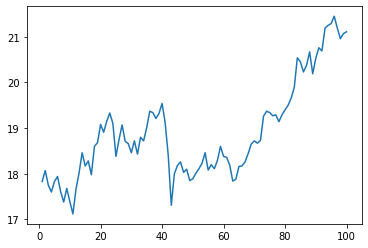

In [159]:
plt.plot(new_day_prediction,scaler.inverse_transform(df2[1157:]))
plt.plot(day_prediction,scaler.inverse_transform(lst_output))

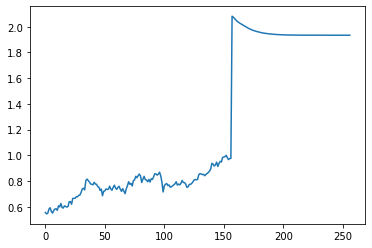

In [160]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])

In [161]:
df3=scaler.inverse_transform(df3).tolist()

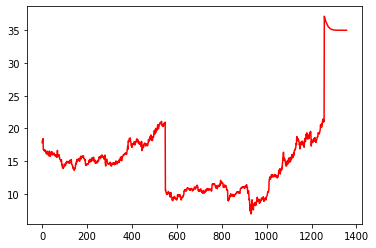

In [162]:
plt.plot(df3,color='red')

Final Prediction of graph shows that after 100 days stock will be going up and then it will be constant for some time according to the train and test data what we got..
thanks
